In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('../1_Data/datasets/from2018.csv')

# Preprocess

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          43824 non-null  int64  
 1   Date                43824 non-null  object 
 2   Hr_End              43824 non-null  int64  
 3   DA_Demand           43824 non-null  float64
 4   RT_Demand           43824 non-null  float64
 5   DA_LMP              43824 non-null  float64
 6   DA_EC               43824 non-null  float64
 7   DA_CC               43824 non-null  float64
 8   DA_MLC              43824 non-null  float64
 9   RT_LMP              43824 non-null  float64
 10  RT_EC               43824 non-null  float64
 11  RT_CC               43824 non-null  float64
 12  RT_MLC              43824 non-null  float64
 13  Dry_Bulb            43824 non-null  int64  
 14  Dew_Point           43824 non-null  int64  
 15  System_Load         43824 non-null  int64  
 16  Reg_

No missing values

In [4]:
df = df[['Date','System_Load']].sort_values('Date')
df

,Date,System_Load
0,2018-01-01 01:00:00,15760
19,2018-01-01 02:00:00,15297
15,2018-01-01 03:00:00,15014
16,2018-01-01 04:00:00,14895
17,2018-01-01 05:00:00,14965
...,...,...
43806,2022-12-31 20:00:00,13489
43807,2022-12-31 21:00:00,12868
43804,2022-12-31 22:00:00,12264
43821,2022-12-31 23:00:00,11634


In [5]:
df['Date'] = pd.to_datetime(df['Date'] )
df

,Date,System_Load
0,2018-01-01 01:00:00,15760
19,2018-01-01 02:00:00,15297
15,2018-01-01 03:00:00,15014
16,2018-01-01 04:00:00,14895
17,2018-01-01 05:00:00,14965
...,...,...
43806,2022-12-31 20:00:00,13489
43807,2022-12-31 21:00:00,12868
43804,2022-12-31 22:00:00,12264
43821,2022-12-31 23:00:00,11634


In [6]:
df = df.set_index('Date')

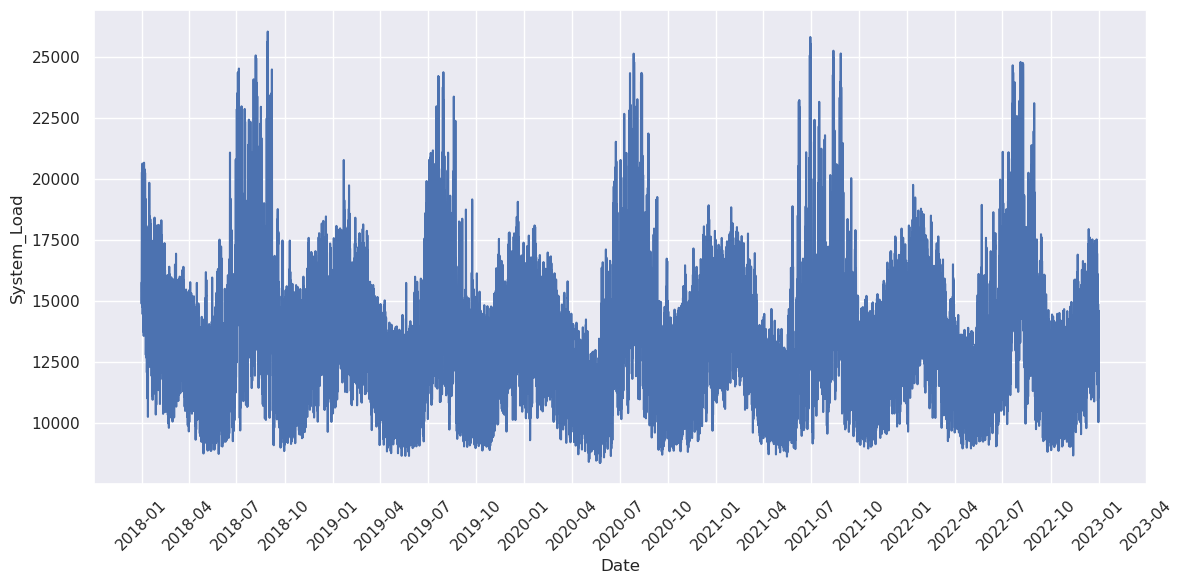

In [7]:
plt.figure(figsize=(12, 6))  

ax = sns.lineplot(x=df.index, y='System_Load', data=df)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation=45)  
plt.tight_layout()  

## Split data for plotting results

In [8]:
train_size = int(len(df) * 0.9) 
train, test = df['System_Load'].iloc[:train_size].reset_index().set_index('Date'), df['System_Load'].iloc[train_size:].reset_index().set_index('Date')

In [9]:
df

,System_Load
Date,
2018-01-01 01:00:00,15760
2018-01-01 02:00:00,15297
2018-01-01 03:00:00,15014
2018-01-01 04:00:00,14895
2018-01-01 05:00:00,14965
...,...
2022-12-31 20:00:00,13489
2022-12-31 21:00:00,12868
2022-12-31 22:00:00,12264


In [10]:
train

,System_Load
Date,
2018-01-01 01:00:00,15760
2018-01-01 02:00:00,15297
2018-01-01 03:00:00,15014
2018-01-01 04:00:00,14895
2018-01-01 05:00:00,14965
...,...
2022-07-02 05:00:00,13082
2022-07-02 06:00:00,12976
2022-07-02 07:00:00,13161


# ARIMA Univariate

## ARIMA requires the series to be stationary. Using Augmented Dickey-Fuller (ADF) test to check for stationarity.

The Augmented Dickey-Fuller (ADF) test is a common statistical test used to determine whether a given time series is stationary or not. A time series is considered stationary if its statistical properties, like mean and variance, do not change over time.

Null Hypothesis (H0): The time series is non-stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train['System_Load'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.905904
p-value: 0.000000


- ADF Statistic: This is the test statistic used to determine whether to reject the null hypothesis. The more negative the statistic, the stronger the rejection of the null hypothesis.
- p-value: This tells us the probability of observing the test results under the null hypothesis. A lower p-value (commonly below 0.05) indicates strong evidence against the null hypothesis.

The ADF Statistic is highly negative.
The p-value is essentially zero, which means there is extremely strong evidence against the null hypothesis. 
We can confidently say the time series does not have a unit root and is stationary.

ARIMA models assume the time series you are trying to forecast is stationary. Stationarity is important because non-stationary data can contain trends and seasonality, which can affect the stability of your coefficients over time and, in turn, the reliability of your forecasts.

## Autocorrelation Function and the Partial Autocorrelation Function. 

These functions are fundamental tools for identifying the order of autoregressive and moving average components in an ARIMA model.

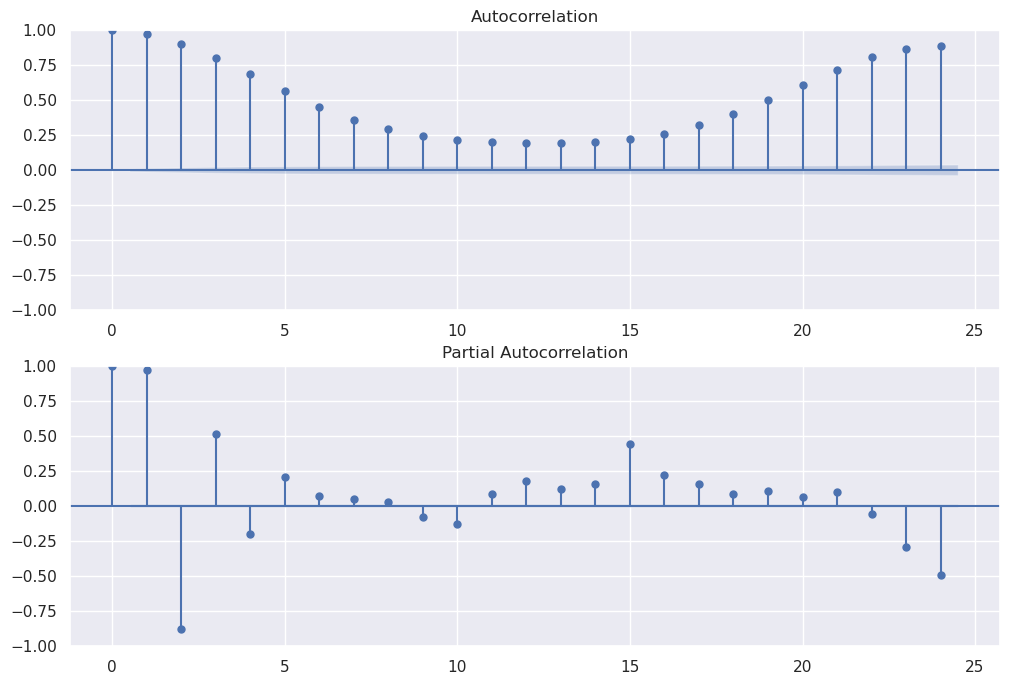

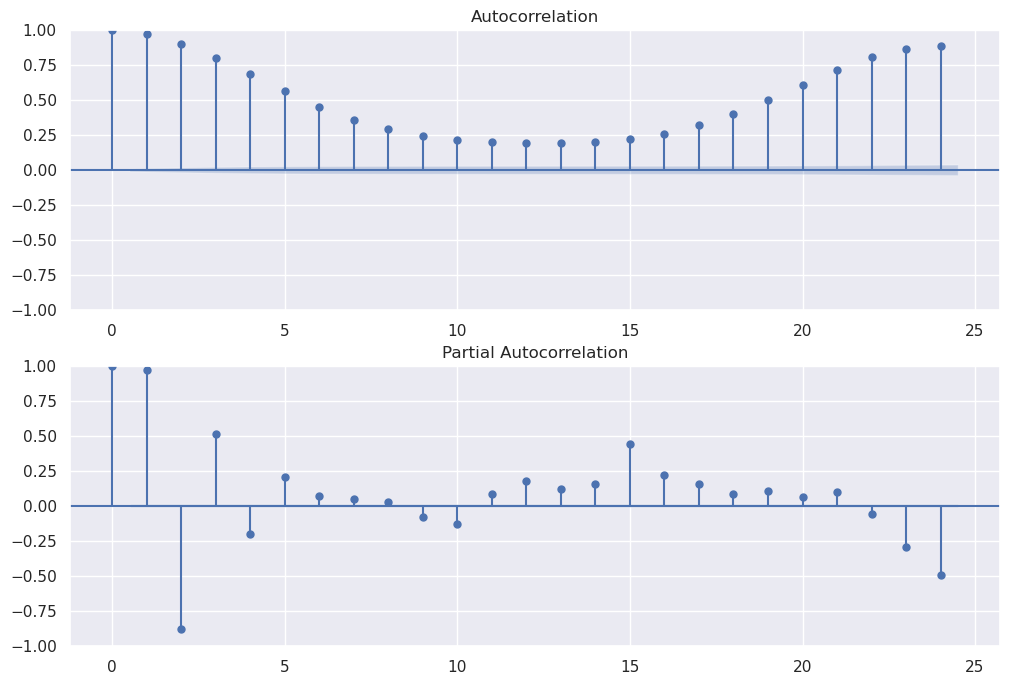

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train['System_Load'], lags=24, ax=ax1)
plot_pacf(train['System_Load'], lags=24, method='ywm', ax=ax2)

the PACF plot shows significant partial autocorrelation at lags 1 and 2, and then cuts off, considering starting with an AR term of *p*=2

Since the ADF test indicated that our series is stationary,we will not difference the data (*d*=0)

ACF plot tails off but shows significant autocorrelation at lag 1, considering starting with an MA term of *q*=1

## ARIMA

Based on the observations from the ACF and PACF plots, starting with an ARIMA(2, 0, 1) model but also trying different configurations.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 0, 1)
                               SARIMAX Results                                
Dep. Variable:            System_Load   No. Observations:                39441
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -288451.261
Date:                Sun, 28 Apr 2024   AIC                         576910.522
Time:                        18:06:40   BIC                         576944.852
Sample:                    01-01-2018   HQIC                        576921.396
                         - 07-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.36e+04    109.431    124.244      0.000    1.34e+04    1.38e+04
ar.L1          0.9675      0.001    751.597      0.000       0.965       0.970
ma.L1          0.8876      0.002    4

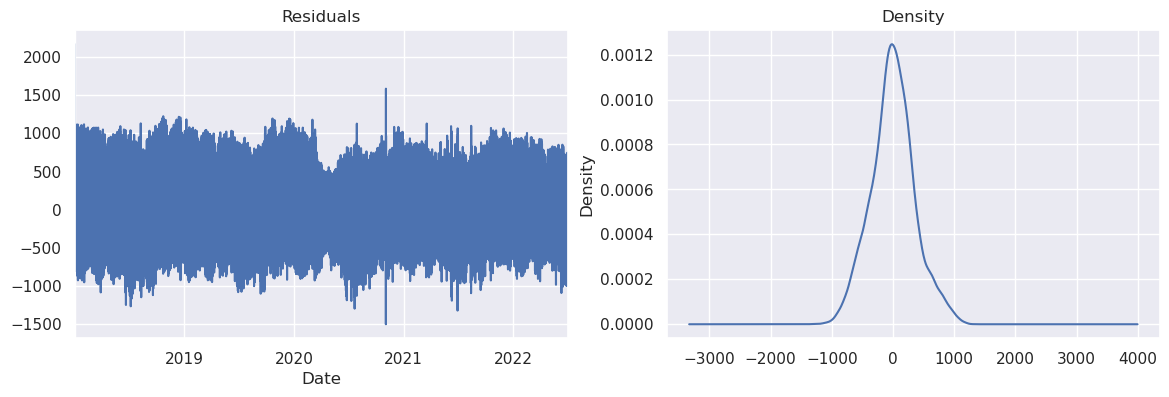

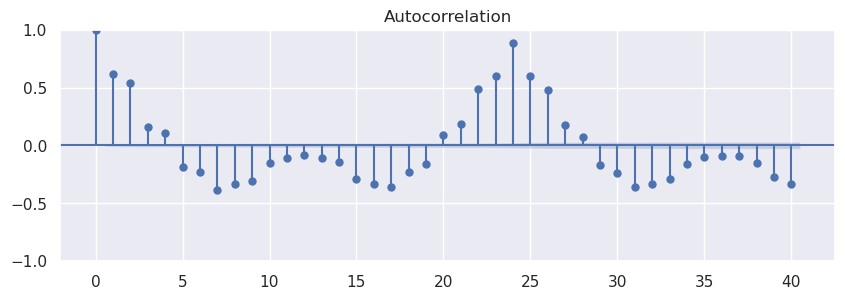

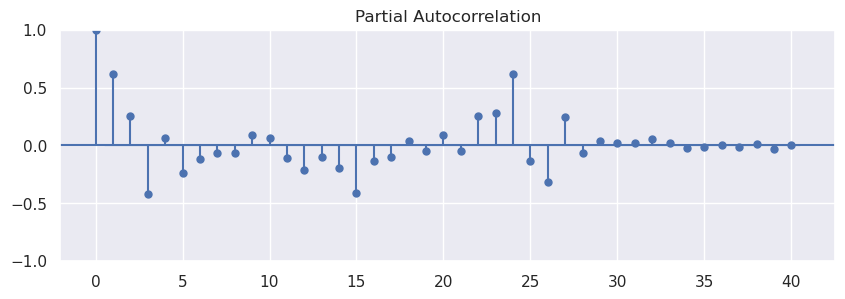

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1)
                               SARIMAX Results                                
Dep. Variable:            System_Load   No. Observations:                39441
Model:                 ARIMA(2, 0, 1)   Log Likelihood             -273080.581
Date:                Sun, 28 Apr 2024   AIC                         546171.162
Time:                        18:06:50   BIC                         546214.075
Sample:                    01-01-2018   HQIC                        546184.754
                         - 07-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.36e+04     46.674    291.302      0.000    1.35e+04    1.37e+04
ar.L1          1.7378      0.003    579.156      0.000       1.732       1.744
ar.L2         -0.7907      0.003   -2

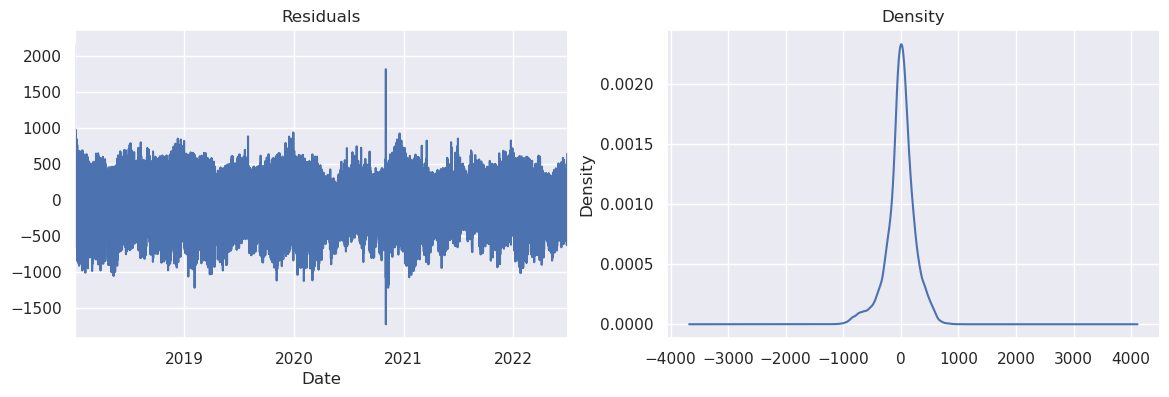

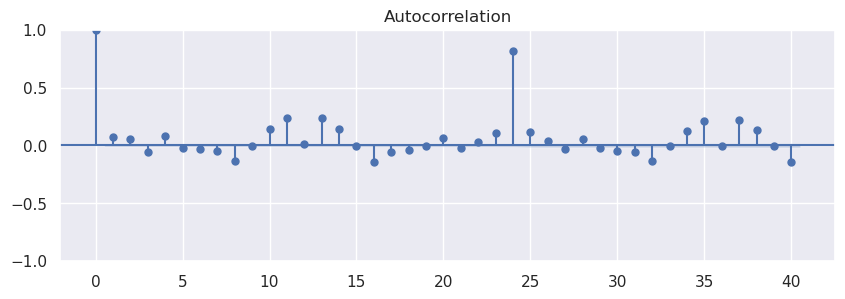

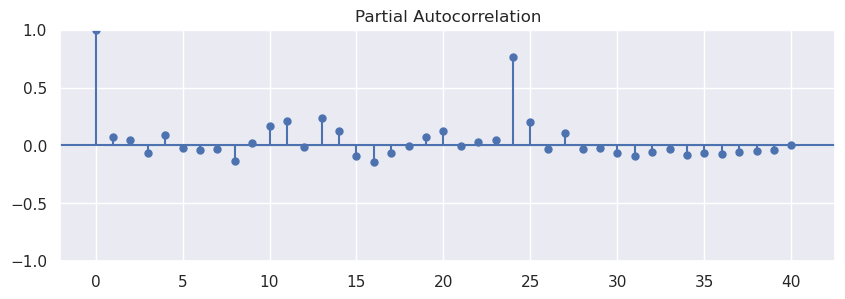

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2)
                               SARIMAX Results                                
Dep. Variable:            System_Load   No. Observations:                39441
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -272632.371
Date:                Sun, 28 Apr 2024   AIC                         545276.743
Time:                        18:06:58   BIC                         545328.238
Sample:                    01-01-2018   HQIC                        545293.053
                         - 07-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.36e+04     53.455    254.347      0.000    1.35e+04    1.37e+04
ar.L1          1.6633      0.005    346.895      0.000       1.654       1.673
ar.L2         -0.7193      0.005   -1

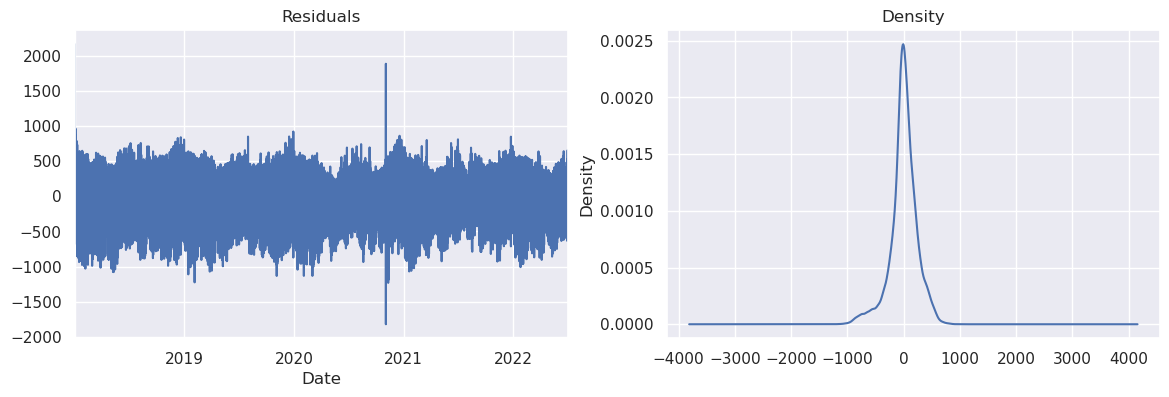

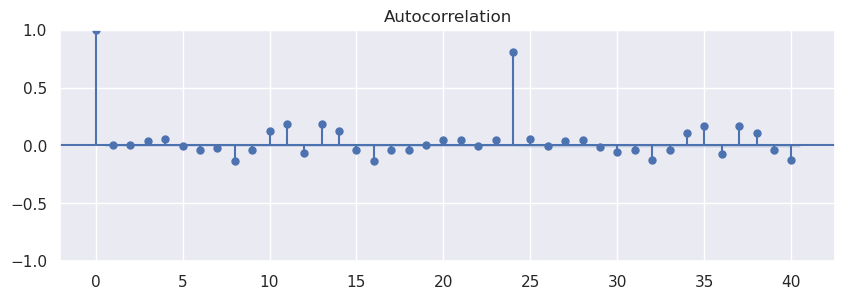

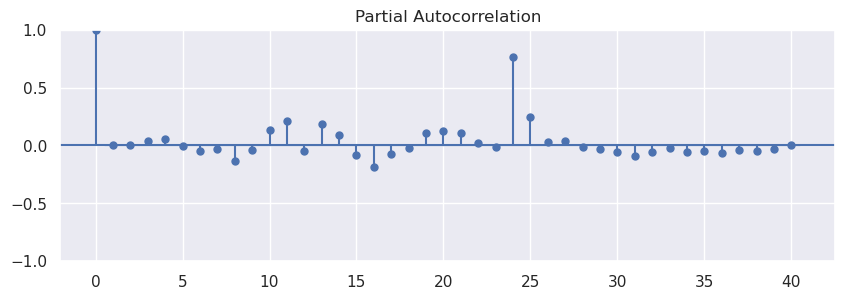

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:            System_Load   No. Observations:                39441
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -271640.442
Date:                Sun, 28 Apr 2024   AIC                         543290.884
Time:                        18:07:02   BIC                         543333.797
Sample:                    01-01-2018   HQIC                        543304.476
                         - 07-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7212      0.003    653.615      0.000       1.716       1.726
ar.L2         -0.8178      0.002   -343.531      0.000      -0.822      -0.813
ma.L1         -0.3728      0.004    -

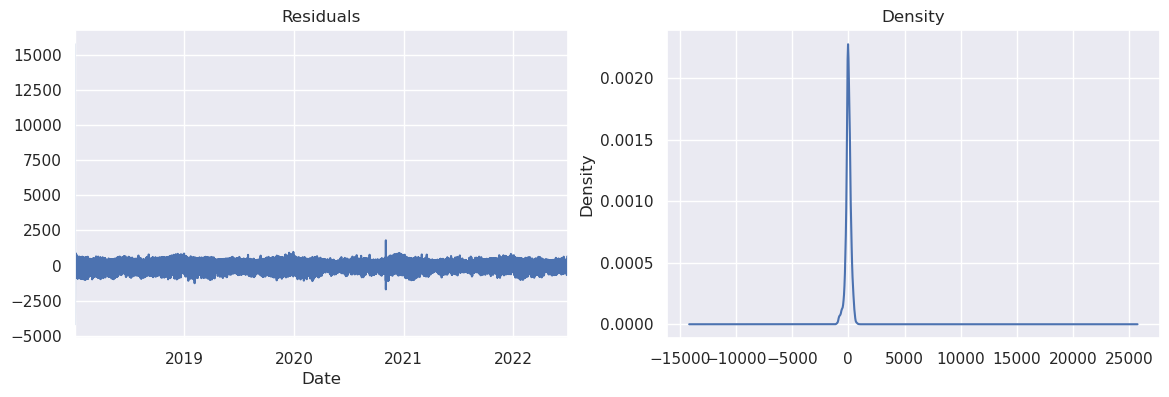

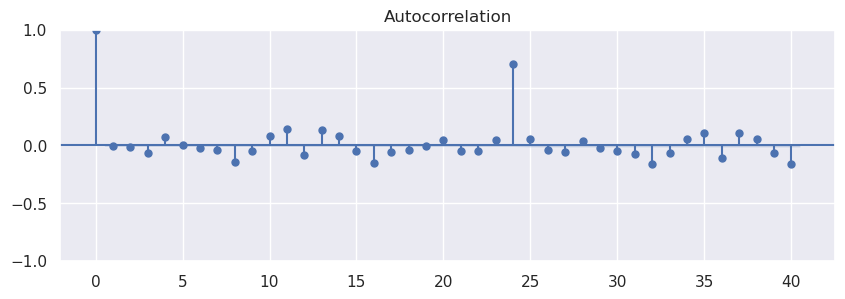

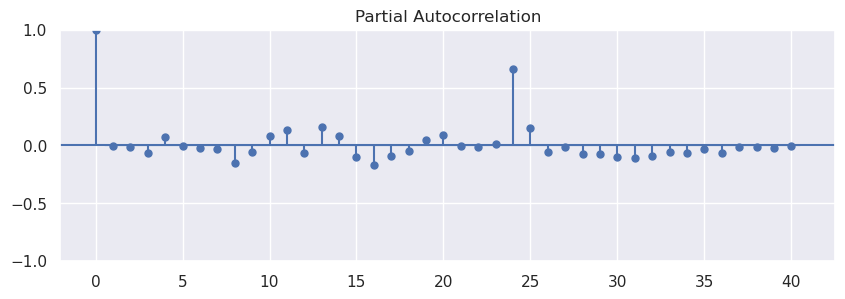

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

def fit_arima_and_check_residuals(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    
    print(f"ARIMA{order}")
    print(model_fit.summary())
    
    residuals = model_fit.resid
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    
    # check if residuals are normally distributed
    mean, std = norm.fit(residuals)
    print(f"Residuals are normally distributed with mean {mean} and std {std}: ", 
          "Yes" if std > 0 else "No")
    
    # plot ACF of residuals
    fig, ax = plt.subplots(figsize=(10, 3))
    plot_acf(residuals, ax=ax, lags=40)
    plt.show()
    
    # plot PACF of residuals
    fig, ax = plt.subplots(figsize=(10, 3))
    plot_pacf(residuals, ax=ax, lags=40, method='ywm')
    plt.show()

    return model_fit


orders = [(1, 0, 1), (2, 0, 1), (2, 0, 2), (2, 1, 2)]

for order in orders:
    fit_arima_and_check_residuals(train['System_Load'], order)

ARIMA(2, 1, 2) seems to be the best model

The density of the residuals is more concentrated around zero, there are fewer significant spikes in the ACF plot compared to the previous models. The residuals appear to be more stable over time with less variation, suggesting that differencing (d=1) was beneficial

# Predicts and check error

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)  
r_squared = r2_score(test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


MAE: 3030.708576587602
MSE: 12806766.533767095
RMSE: 3578.6542908986185
R-squared: -0.3462195788096887


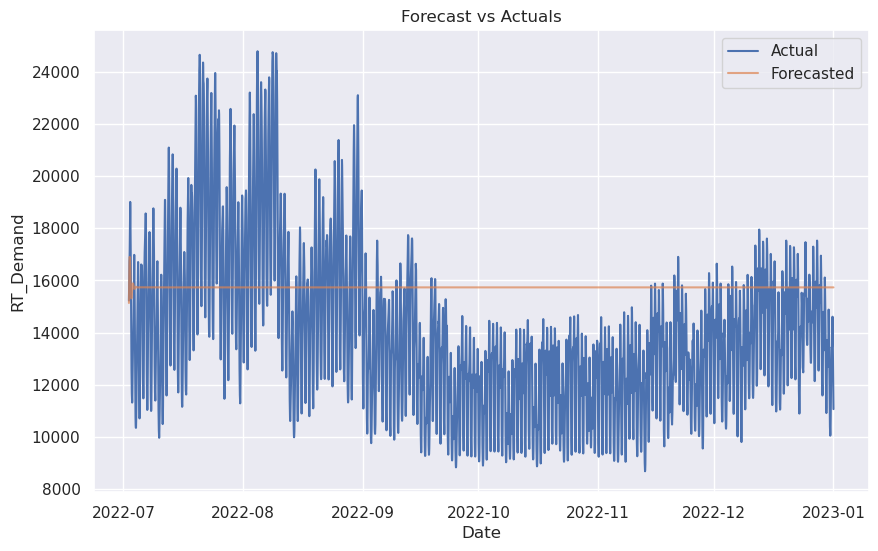

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Forecasted', alpha=0.7)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('RT_Demand')
plt.legend()
plt.show()

MAE for the first 24 hours: 1907.4719447057566
MSE for the first 24 hours: 5930070.677631076
RMSE for the first 24 hours: 2435.17364424615
R-squared for the first 24 hours: 0.13059527024817763


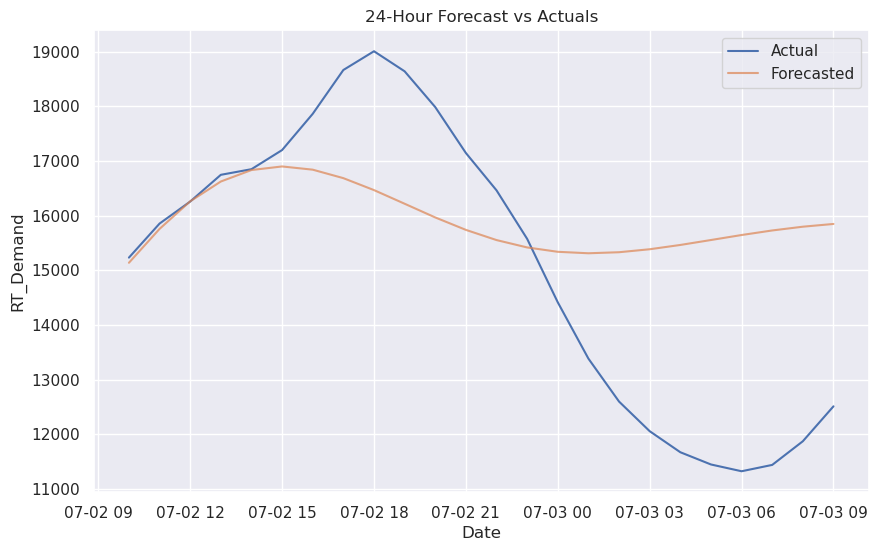

In [16]:
hours_to_predict = 24

next_24_hours = model_fit.forecast(steps=hours_to_predict)

forecast_index = pd.date_range(start=test.index[0], periods=hours_to_predict, freq='H')

forecast_series = pd.Series(next_24_hours, index=forecast_index)

mae = mean_absolute_error(test[:hours_to_predict], forecast_series)
mse = mean_squared_error(test[:hours_to_predict], forecast_series)
rmse = np.sqrt(mse)  
r_squared = r2_score(test[:hours_to_predict], forecast_series)

print(f'MAE for the first {hours_to_predict} hours: {mae}')
print(f'MSE for the first {hours_to_predict} hours: {mse}')
print(f'RMSE for the first {hours_to_predict} hours: {rmse}')
print(f'R-squared for the first {hours_to_predict} hours: {r_squared}')

plt.figure(figsize=(10, 6))
plt.plot(test[:hours_to_predict].index, test[:hours_to_predict], label='Actual')
plt.plot(forecast_series.index, forecast_series, label='Forecasted', alpha=0.7)
plt.title(f'{hours_to_predict}-Hour Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('RT_Demand')
plt.legend()
plt.show()

### (2, 0, 1)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = ARIMA(train, order=(2, 0, 1))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)  
r_squared = r2_score(test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


MAE: 2339.2870759739026
MSE: 9594321.135137225
RMSE: 3097.470118522086
R-squared: -0.008534271586357


MAE for the first 24 hours: 1863.1650588945631
MSE for the first 24 hours: 5000111.16093234
RMSE for the first 24 hours: 2236.092833701754
R-squared for the first 24 hours: 0.2669361751458882


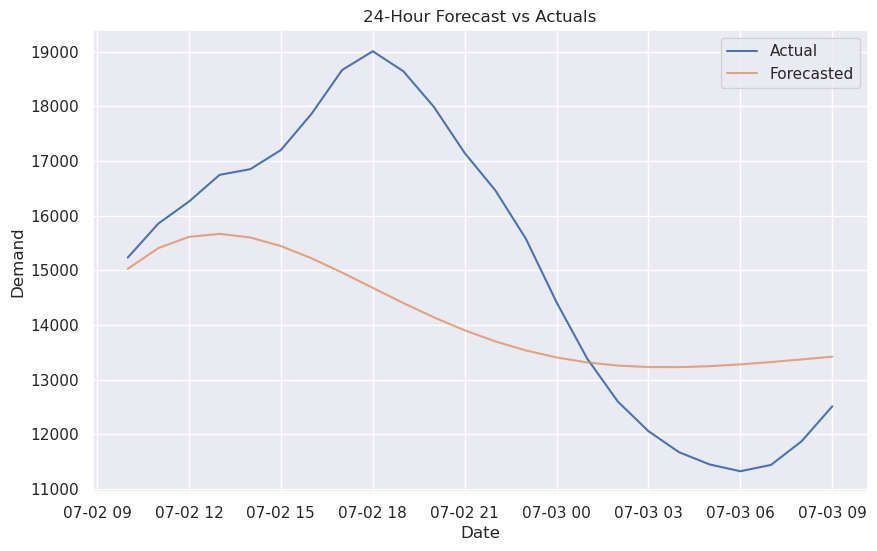

In [24]:
hours_to_predict = 24

next_40_hours = model_fit.forecast(steps=hours_to_predict)

forecast_index = pd.date_range(start=test.index[0], periods=hours_to_predict, freq='H')

forecast_series = pd.Series(next_40_hours, index=forecast_index)

mae = mean_absolute_error(test[:hours_to_predict], forecast_series)
mse = mean_squared_error(test[:hours_to_predict], forecast_series)
rmse = np.sqrt(mse)  
r_squared = r2_score(test[:hours_to_predict], forecast_series)

print(f'MAE for the first {hours_to_predict} hours: {mae}')
print(f'MSE for the first {hours_to_predict} hours: {mse}')
print(f'RMSE for the first {hours_to_predict} hours: {rmse}')
print(f'R-squared for the first {hours_to_predict} hours: {r_squared}')

plt.figure(figsize=(10, 6))
plt.plot(test[:hours_to_predict].index, test[:hours_to_predict], label='Actual')
plt.plot(forecast_series.index, forecast_series, label='Forecasted', alpha=0.7)
plt.title(f'{hours_to_predict}-Hour Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()